# Ford GoBike Exploration 
## by (Said Fawzy Mohammed Huda)

## Preliminary Wrangling

> This data set includes information about individual rides made
in a bike-sharing system covering the greater San Francisco
Bay area..
> We will try to explore what affects the Number of rides : 
> - Dose the time of ride affect number of rides ? (specific day of the week , specific month of the year year)
> - What is the average rate of the trips ?
> - Does the Number of trips depends on the type of the user (customer or subscriber).
> - Dose the gender affect( Male or Female)
> - Dose the compination of Gender and age affect the duration ?
> - Dose the compnation of type of user and age affect the duration ?

In [157]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb

%matplotlib inline

####  Loading in the  dataset

In [158]:
#importing data
bike_orig=pd.read_csv('201902-fordgobike-tripdata.csv')
bike_orig.head()

,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,end_station_longitude,bike_id,user_type,member_birth_year,member_gender,bike_share_for_all_trip
0,52185,2019-02-28 17:32:10.1450,2019-03-01 08:01:55.9750,21.0,Montgomery St BART Station (Market St at 2nd St),37.789625,-122.400811,13.0,Commercial St at Montgomery St,37.794231,-122.402923,4902,Customer,1984.0,Male,No
1,42521,2019-02-28 18:53:21.7890,2019-03-01 06:42:03.0560,23.0,The Embarcadero at Steuart St,37.791464,-122.391034,81.0,Berry St at 4th St,37.775880,-122.393170,2535,Customer,NaN,NaN,No
2,61854,2019-02-28 12:13:13.2180,2019-03-01 05:24:08.1460,86.0,Market St at Dolores St,37.769305,-122.426826,3.0,Powell St BART Station (Market St at 4th St),37.786375,-122.404904,5905,Customer,1972.0,Male,No
3,36490,2019-02-28 17:54:26.0100,2019-03-01 04:02:36.8420,375.0,Grove St at Masonic Ave,37.774836,-122.446546,70.0,Central Ave at Fell St,37.773311,-122.444293,6638,Subscriber,1989.0,Other,No
4,1585,2019-02-28 23:54:18.5490,2019-03-01 00:20:44.0740,7.0,Frank H Ogawa Plaza,37.804562,-122.271738,222.0,10th Ave at E 15th St,37.792714,-122.248780,4898,Subscriber,1974.0,Male,Yes


In [159]:
bike_orig.shape

(183412, 16)

In [160]:
bike_orig.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 183412 entries, 0 to 183411
Data columns (total 16 columns):
 #   Column                   Non-Null Count   Dtype  
---  ------                   --------------   -----  
 0   duration_sec             183412 non-null  int64  
 1   start_time               183412 non-null  object 
 2   end_time                 183412 non-null  object 
 3   start_station_id         183215 non-null  float64
 4   start_station_name       183215 non-null  object 
 5   start_station_latitude   183412 non-null  float64
 6   start_station_longitude  183412 non-null  float64
 7   end_station_id           183215 non-null  float64
 8   end_station_name         183215 non-null  object 
 9   end_station_latitude     183412 non-null  float64
 10  end_station_longitude    183412 non-null  float64
 11  bike_id                  183412 non-null  int64  
 12  user_type                183412 non-null  object 
 13  member_birth_year        175147 non-null  float64
 14  memb

#### Remarks:

>- We have a data set of 16 fields of features that records rides.
>- We have 183,412 records
>-As we can see , we have many records containing null values in fields of many fields like : **Start Station ,,End Station, birth year .....)**
>- I suggest remove those records to have a reliable data


#### Suggestion :

>- Remove Records with Null values 
>- Convert Start time into datetime 
>- Extract New fields :**day** and **Month** from the Start Time 
>- Add new calculated field : **Age** 

In [161]:
#Checking for duplicates
bike_orig.duplicated().sum()

0

In [162]:
# Removing Null records and save into new data frame BIKE
bike=bike_orig.dropna(axis=0)
bike.shape

(174952, 16)

In [163]:
#Let us check the Null values in new data frame
bike.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 174952 entries, 0 to 183411
Data columns (total 16 columns):
 #   Column                   Non-Null Count   Dtype  
---  ------                   --------------   -----  
 0   duration_sec             174952 non-null  int64  
 1   start_time               174952 non-null  object 
 2   end_time                 174952 non-null  object 
 3   start_station_id         174952 non-null  float64
 4   start_station_name       174952 non-null  object 
 5   start_station_latitude   174952 non-null  float64
 6   start_station_longitude  174952 non-null  float64
 7   end_station_id           174952 non-null  float64
 8   end_station_name         174952 non-null  object 
 9   end_station_latitude     174952 non-null  float64
 10  end_station_longitude    174952 non-null  float64
 11  bike_id                  174952 non-null  int64  
 12  user_type                174952 non-null  object 
 13  member_birth_year        174952 non-null  float64
 14  memb

In [164]:
#Converting start_time into datetime type
bike['start_time']= pd.to_datetime(bike['start_time'])

<ipython-input-164-bdb6d7237414>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  bike['start_time']= pd.to_datetime(bike['start_time'])


In [165]:
#Check the change
bike.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 174952 entries, 0 to 183411
Data columns (total 16 columns):
 #   Column                   Non-Null Count   Dtype         
---  ------                   --------------   -----         
 0   duration_sec             174952 non-null  int64         
 1   start_time               174952 non-null  datetime64[ns]
 2   end_time                 174952 non-null  object        
 3   start_station_id         174952 non-null  float64       
 4   start_station_name       174952 non-null  object        
 5   start_station_latitude   174952 non-null  float64       
 6   start_station_longitude  174952 non-null  float64       
 7   end_station_id           174952 non-null  float64       
 8   end_station_name         174952 non-null  object        
 9   end_station_latitude     174952 non-null  float64       
 10  end_station_longitude    174952 non-null  float64       
 11  bike_id                  174952 non-null  int64         
 12  user_type       

In [166]:
#Add new field week_day
bike['week_day'] =bike['start_time'].dt.weekday


<ipython-input-166-5767dbc4fcc0>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  bike['week_day'] =bike['start_time'].dt.weekday


In [167]:
#let us convert the week day to names
day_lock ={0: 'sunday',1:'monday',2:'tuseday',3: 'wednesday', 4:'thursday', 5:'friday',6: 'saturday' }

In [168]:
bike['week_day'] = bike['week_day'].apply(lambda x: day_lock[x])


<ipython-input-168-09361e2dbf07>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  bike['week_day'] = bike['week_day'].apply(lambda x: day_lock[x])


In [169]:
#Let us add month column 
bike['month']=bike['start_time'].dt.month

<ipython-input-169-15ee09c2186b>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  bike['month']=bike['start_time'].dt.month


In [170]:
#let us convert the month name
look_up = {1: 'Jan', 2: 'Feb', 3: 'Mar', 4: 'Apr', 5: 'May',
            6: 'Jun', 7: 'Jul', 8: 'Aug', 9: 'Sep', 10: 'Oct', 11: 'Nov', 12: 'Dec'}

bike['month'] = bike['month'].apply(lambda x: look_up[x])


<ipython-input-170-cc5dbb6fa81a>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  bike['month'] = bike['month'].apply(lambda x: look_up[x])


In [171]:
#Let us add the age column
bike['age']=2021- bike['member_birth_year']

<ipython-input-171-dd3ae3e74dc8>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  bike['age']=2021- bike['member_birth_year']


In [172]:
#Let us check the new fields we added
bike.head(1)

,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,end_station_longitude,bike_id,user_type,member_birth_year,member_gender,bike_share_for_all_trip,week_day,month,age
0,52185,2019-02-28 17:32:10.145,2019-03-01 08:01:55.9750,21.0,Montgomery St BART Station (Market St at 2nd St),37.789625,-122.400811,13.0,Commercial St at Montgomery St,37.794231,-122.402923,4902,Customer,1984.0,Male,No,wednesday,Feb,37.0


In [173]:
bike.shape

(174952, 19)

### What is the structure of your dataset?

> The new Bike dataset that we will use will have **19** fields and **174,952** records

### What is/are the main feature(s) of interest in your dataset?

> We will be interested in :
>- The Number of rides ,and if the time or type of user affect
>- The duration of ride and if it is affected by user type or gender 

### What features in the dataset do you think will help support your investigation into your feature(s) of interest?

> Those features will help us investigate :
>- The week day of the ride
>- Month of the ride
>- Ride Duration
>- The Age of the member
>- The Gender of the member
>- The user type (customer of subscriber).

## Univariate Exploration

> In this section,  we will investigate distributions of individual variables. If
we saw unusual points or outliers, we could take a deeper look to clean things up
and prepare ourselves to look at relationships between variables.

### Week_day Variable :

In [174]:
#our data is collected in one month Feb ..so we can not see the affect of month
bike.month.value_counts()

Feb    174952
Name: month, dtype: int64

Text(0.5, 1.0, 'Number of Rides for every day of the week')

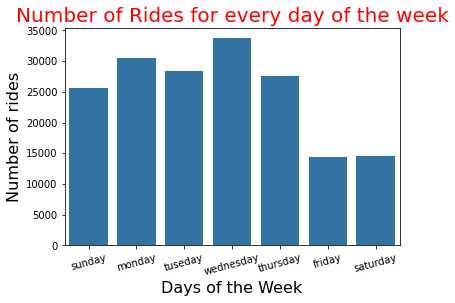

In [175]:
# Let us see if day of the week  affect the number of rides
base_color = sb.color_palette()[0]
day_order =['sunday','monday','tuseday', 'wednesday', 'thursday', 'friday', 'saturday']
sb.countplot(data=bike,x='week_day',color=base_color,
            order =day_order )
plt.xlabel('Days of the Week' ,size=16)
plt.ylabel('Number of rides',size=16)
plt.xticks(rotation=15);
plt.title('Number of Rides for every day of the week',size=20,color='red')

Text(0.5, 1.0, 'Number of Rides for every day of the week')

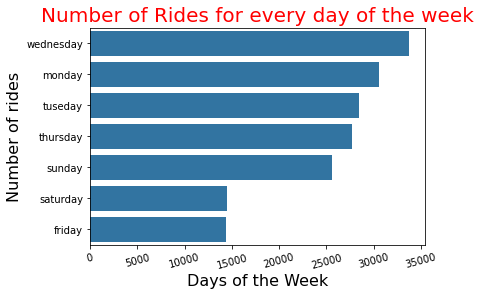

In [176]:
#Let us have the diagram orderd 
day_order = bike['week_day'].value_counts().index
sb.countplot(data=bike,y='week_day',color=base_color,
            order =day_order )
plt.xlabel('Days of the Week' ,size=16)
plt.ylabel('Number of rides',size=16)
plt.xticks(rotation=15);
plt.title('Number of Rides for every day of the week',size=20 , color='red')

#### Remarks on day of the week :

> As you can see :
>- The most rides happen in the Wednesdays , Mondays , Tusedays in order
>- The rate of rides is so low in Saturdays and Fridays 

### Member_Gender Variable :

> let us see who rides more , Male or female 


In [177]:
gender_counts = bike.member_gender.value_counts()
gender_counts

Male      130500
Female     40805
Other       3647
Name: member_gender, dtype: int64

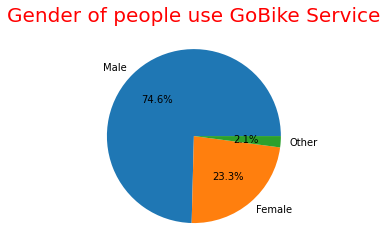

In [178]:
plt.pie(gender_counts , labels = gender_counts.index,autopct='%1.1f%%' );
plt.title('Gender of people use GoBike Service',fontsize=20,color='red');
plt.show();


#### Remarks on gender :

> As you can see most people use the service are **Male**

### User Type Vaiabel

> Let us see who ride more Customers or subscribers

In [179]:
user_counts = bike.user_type.value_counts()
user_counts

Subscriber    158386
Customer       16566
Name: user_type, dtype: int64

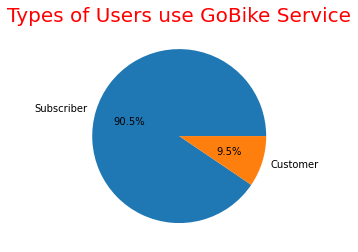

In [180]:
plt.pie(user_counts , labels = user_counts.index,autopct='%1.1f%%' );
plt.title('Types of Users use GoBike Service',fontsize=20 ,color='red');
plt.show();

#### Remarks on User Type :

> As you can see most people use the service are **Subscribers**

### Age Variable

> Let us see the distribution of ages of the members that use the service

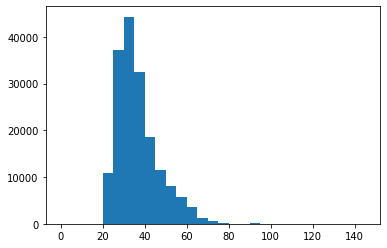

In [91]:
bins = np.arange(0,bike['age'].max()+5,5)
plt.hist(data=bike, x= 'age',bins=bins);

#### First observation is that we have ouliers that are so odd .Let us investigate the age data in details

In [92]:
#Let us check what is the avarage of ages using the serive
bike.age.mean()

36.196865425945404

In [93]:
#Let us see the max
bike.age.max()

143.0

In [94]:
#Let us see the min
bike.age.min()

20.0

##### This is  so odd number ..let us investigate more

In [95]:
bike.query('age> 100').bike_id.count()

75

> We have 75 rows that people age is more than 100 years which is not logi
> Let us remove those records as those must be mistakes in data entry of this field 



In [96]:
bike.drop(bike.loc[bike['age'] >=100].index ,inplace=True)

C:\Users\saidf.TENDER\Anaconda3\lib\site-packages\pandas\core\frame.py:4163: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


#### Now let us invstgate age again

In [97]:
bike.age.mean()

36.16093025383555

In [98]:
bike.age.max()

94.0

In [99]:
bike.age.min()

20.0

Text(0.5, 1.0, 'Age of poeple use GoBike')

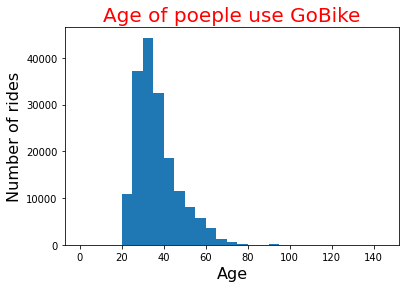

In [181]:
bins = np.arange(0,bike['age'].max()+5,5)
plt.hist(data=bike, x= 'age',bins=bins);
plt.xlabel('Age' ,size=16)
plt.ylabel('Number of rides',size=16)
plt.title('Age of poeple use GoBike',size=20,color='red')

#### Remarks on Age Variable

>- Most people use the services are in age **between 25 and 40**

### Ride Duration Variable

>- Durations are calculated in seconds ..
>- Let us convert it to minutes

In [101]:
bike['dur_in_min'] =bike['duration_sec'] / 60

<ipython-input-101-e6de8cc45081>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  bike['dur_in_min'] =bike['duration_sec'] / 60


In [102]:
#let us see some statistics about duration
bike.dur_in_min.describe()

count    174877.000000
mean         11.733767
std          27.375477
min           1.016667
25%           5.383333
50%           8.500000
75%          13.150000
max        1409.133333
Name: dur_in_min, dtype: float64

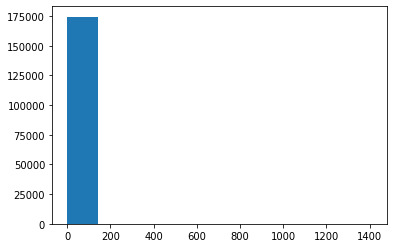

In [103]:
plt.hist(data=bike,x='dur_in_min');


>- As we can see there are outliers that make the distribution not clear
>- let us investigate more
>-Let us concentrate on those  rides less than an hour

In [104]:
bike.query("dur_in_min > 60").dur_in_min.count()

1386

In [105]:
bike_mod= bike.query("dur_in_min < 60")

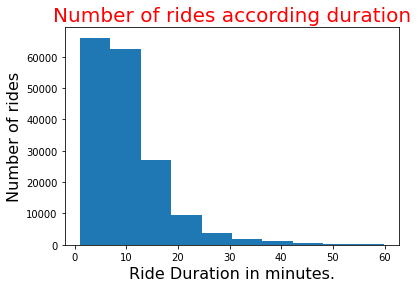

In [182]:
plt.hist(data=bike_mod,x='dur_in_min');
plt.xlabel('Ride Duration in minutes.' ,size=16)
plt.ylabel('Number of rides',size=16)
plt.title('Number of rides according duration' , size=20, color='red');

#### Remarks on duration Variable

> As you can see ...most rides duration is less than 10 min 

### Discuss the distribution(s) of your variable(s) of interest. Were there any unusual points? Did you need to perform any transformations?

> - For **Day of The Week** Variable , we found that the day with high rides was Wednesday and then come after Monday and Tuesday , while Friday and Saturday were the less days which were expected.
> - For The **Gender** Variable we found that most people use the service were male.
> - For the **Type of user** variable we found that most people use the service are **Subscribers**
> - For **Age** Variable we found that most people use the services were in age between 25 Abd 40 , which was expected .And we had to neglect ages that was record over 100 , which were 75 records , as they must be mistake in data entry.
> - For **duration** Variable we found that most ride durations were less than 10 min , which is expected for a bike ride . We had to neglect rifer over 60 min , as they were only  1386 records. 

### Of the features you investigated, were there any unusual distributions? Did you perform any operations on the data to tidy, adjust, or change the form of the data? If so, why did you do this?

> - The distribution of the Variables were as expected
> - We have to only exclude Age > 100 and rides > 60 to concentrate more in the most of the data


## Bivariate Exploration

> In this section, we will investigate relationships between pairs of variables in 
data. 

### ٌRelationship between Age and Ride Duration ?

> Let us see if there is relation between the duration of the ride , and the age of the member.
> We will use limited Dataset that have :
> - Ages < 100
> - Duration less than an hour

In [107]:
#Let us first prepare the new data set
bike_mod2 = bike_mod.query('age < 100')

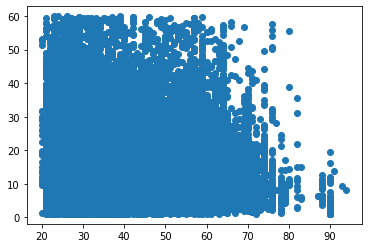

In [108]:
#Plot a scatter plot between age and duration
plt.scatter(data=bike_mod2 , x= 'age',y='dur_in_min');

#### There are a lot of overlapping .. let us use sampling

In [109]:
sample = bike_mod2.sample(10000)

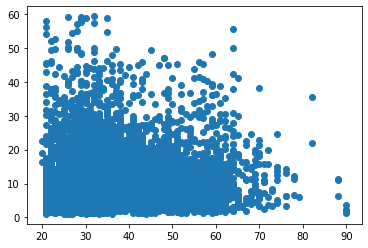

In [110]:
plt.scatter(data=sample , x= 'age',y='dur_in_min');

#### Let us use transperancy

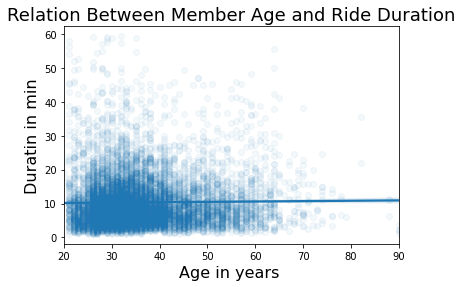

In [111]:
sb.regplot(data=sample , x= 'age',y='dur_in_min', scatter_kws={'alpha':1/20});
plt.xlabel('Age in years ',fontsize=16)
plt.ylabel('Duratin in min',fontsize=16)
plt.title('Relation Between Member Age and Ride Duration',fontsize=18);

### Let us try heat map

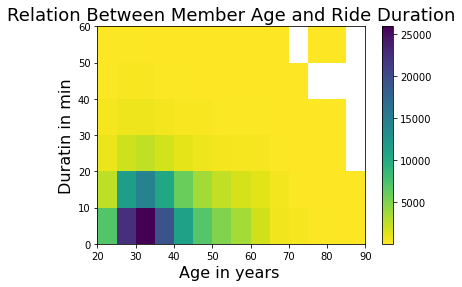

In [112]:
# Specify bin edges 
bins_x = np.arange(20, 90+5, 5)
bins_y = np.arange(0, 60+10, 10)

plt.hist2d(data = bike_mod2, x = 'age', y = 'dur_in_min', cmin=0.5, cmap='viridis_r', bins = [bins_x, bins_y])
plt.colorbar()
plt.xlabel('Age in years ',fontsize=16)
plt.ylabel('Duratin in min',fontsize=16)
plt.title('Relation Between Member Age and Ride Duration',fontsize=18);


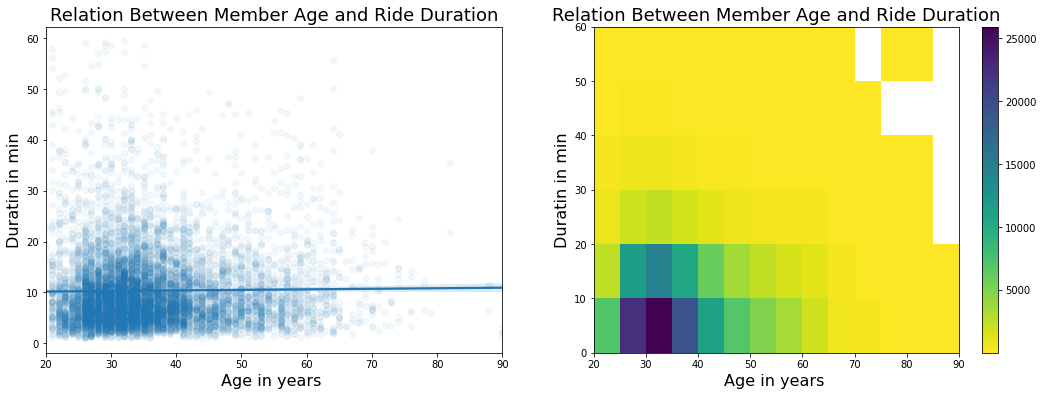

In [113]:
#let us have the two plots in one figur
plt.figure(figsize = [18, 6])

# PLOT ON LEFT
plt.subplot(1, 2, 1)
sb.regplot(data=sample , x= 'age',y='dur_in_min', scatter_kws={'alpha':1/20});
plt.xlabel('Age in years ',fontsize=16)
plt.ylabel('Duratin in min',fontsize=16)
plt.title('Relation Between Member Age and Ride Duration',fontsize=18);

# PLOT ON RIGHT
plt.subplot(1, 2, 2)

plt.hist2d(data = bike_mod2, x = 'age', y = 'dur_in_min', cmin=0.5, cmap='viridis_r', bins = [bins_x, bins_y])
plt.colorbar()
plt.xlabel('Age in years ',fontsize=16)
plt.ylabel('Duratin in min',fontsize=16)
plt.title('Relation Between Member Age and Ride Duration',fontsize=18);

### Remarks on realtion between age and duration :

> As you can see we can tell from the diagram that :
> - Most people use the service are young (less than 40 year old),mostly between 25-40 year old
> - Most rides are less than 10 minutes.
> - There is no clear indication that there is a  relation between member age and the duration of his/ride

### Relation Between Gender and Ride Duration

> Is there relation between the distribution of ride duration and the gender of the member ?
> Let us see.

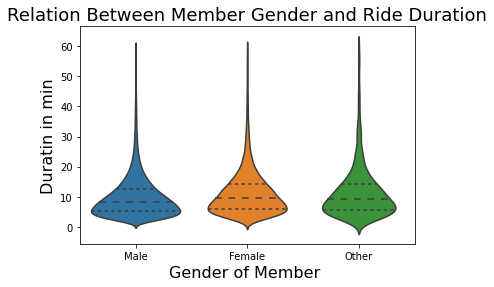

In [114]:
#Plot violin plot
sb.violinplot(data=bike_mod2, x='member_gender', y='dur_in_min',inner='quartile');
plt.xlabel('Gender of Member ',fontsize=16)
plt.ylabel('Duratin in min',fontsize=16)
plt.title('Relation Between Member Gender and Ride Duration',fontsize=18);

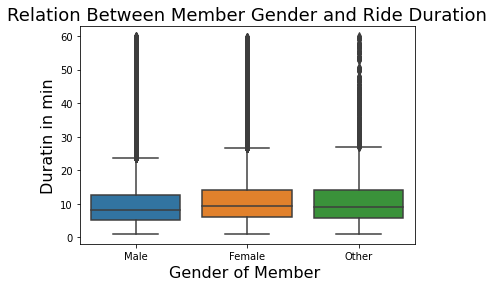

In [115]:
#Plot Box plot
sb.boxplot(data=bike_mod2, x='member_gender', y='dur_in_min');
plt.xlabel('Gender of Member ',fontsize=16)
plt.ylabel('Duratin in min',fontsize=16)
plt.title('Relation Between Member Gender and Ride Duration',fontsize=18);

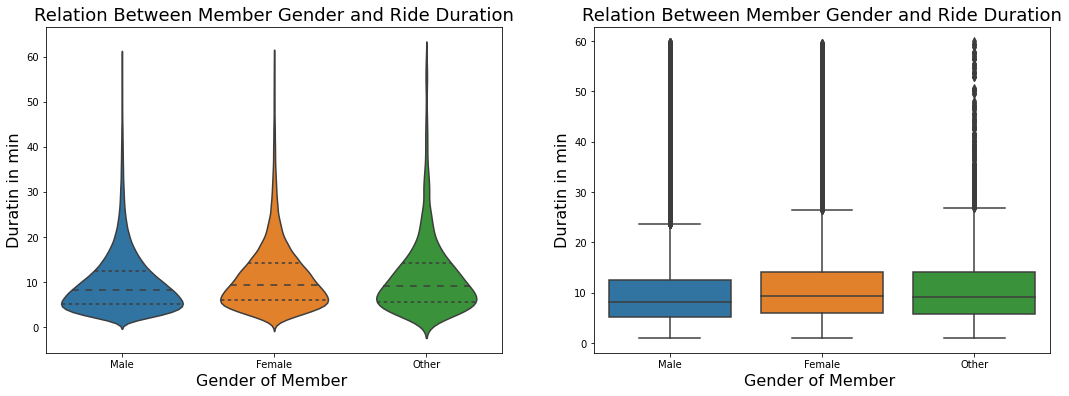

In [116]:
#It is better to have them side by side in one figur
plt.figure(figsize = [18, 6])

# PLOT ON LEFT
plt.subplot(1, 2, 1)

sb.violinplot(data=bike_mod2, x='member_gender', y='dur_in_min',inner='quartile');
plt.xlabel('Gender of Member ',fontsize=16)
plt.ylabel('Duratin in min',fontsize=16)
plt.title('Relation Between Member Gender and Ride Duration',fontsize=18);

# PLOT ON RIGHT
plt.subplot(1, 2, 2)

sb.boxplot(data=bike_mod2, x='member_gender', y='dur_in_min');
plt.xlabel('Gender of Member ',fontsize=16)
plt.ylabel('Duratin in min',fontsize=16)
plt.title('Relation Between Member Gender and Ride Duration',fontsize=18);

#### ٌRemarks on Relationship between Gender and Duration:

> As we can see :
> - There is no effect of gender in the distribution of the ride duration
> - The three gender types have nearly the same distribution.
> - Male may have more slightly less median and disruption of the other two types
> - That mean that male duration has slightly less in average of the other two types


### Relationship Between Type of users and durations

> Let us see if there is relation between the type of users and the duration

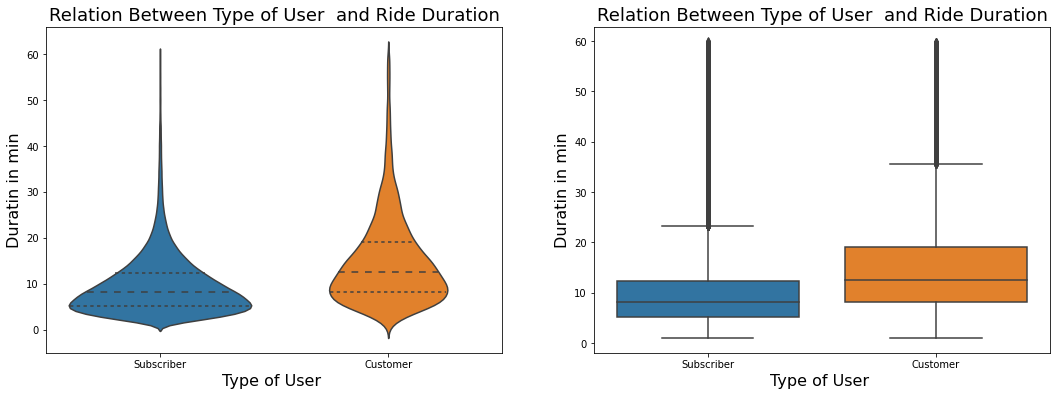

In [117]:
plt.figure(figsize = [18, 6])

# PLOT ON LEFT
plt.subplot(1, 2, 1)

sb.violinplot(data=bike_mod2, x='user_type', y='dur_in_min',inner='quartile');
plt.xlabel('Type of User ',fontsize=16)
plt.ylabel('Duratin in min',fontsize=16)
plt.title('Relation Between Type of User  and Ride Duration',fontsize=18);

# PLOT ON RIGHT
plt.subplot(1, 2, 2)

sb.boxplot(data=bike_mod2, x='user_type', y='dur_in_min');
plt.xlabel('Type of User ',fontsize=16)
plt.ylabel('Duratin in min',fontsize=16)
plt.title('Relation Between Type of User  and Ride Duration',fontsize=18);

##### Remarks on realationship between Type of user and the duration

> Although as we saw before that number of customer is only 9.5 % of all users , they are more distributed and have more average duration than the Subscribers that represents 90.5 %.

### Realationship between Type of User and the User Gender

> Let us see how is the distripution of user type according to gender

#### Using Clusterd barchart

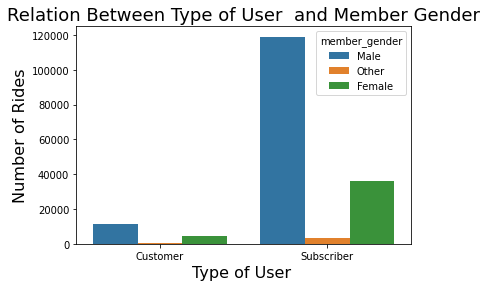

In [118]:
sb.countplot(data=bike,x='user_type', hue='member_gender')
plt.xlabel('Type of User ',fontsize=16)
plt.ylabel('Number of Rides',fontsize=16)
plt.title('Relation Between Type of User  and Member Gender',fontsize=18);


#### Using Heatmap

In [119]:
# Number of rides in each combination
user_counts = bike.groupby(['user_type', 'member_gender']).size()
user_counts

user_type   member_gender
Customer    Female             4622
            Male              11489
            Other               450
Subscriber  Female            36169
            Male             118951
            Other              3196
dtype: int64

In [120]:
#  convert  into a dataframe object
user_counts = user_counts.reset_index(name='count')
user_counts

,user_type,member_gender,count
0,Customer,Female,4622
1,Customer,Male,11489
2,Customer,Other,450
3,Subscriber,Female,36169
4,Subscriber,Male,118951
5,Subscriber,Other,3196


In [121]:
#  rearrange the data on rows
user_counts = user_counts.pivot(index = 'user_type', columns = 'member_gender', values = 'count')
user_counts

member_gender,Female,Male,Other
user_type,,,
Customer,4622,11489,450
Subscriber,36169,118951,3196


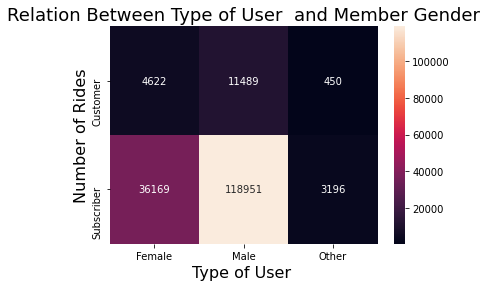

In [122]:
#Plot the heatmap
sb.heatmap(user_counts , annot=True , fmt='d');
plt.xlabel('Type of User ',fontsize=16)
plt.ylabel('Number of Rides',fontsize=16)
plt.title('Relation Between Type of User  and Member Gender',fontsize=18);

> It is better have the two plots in one figure

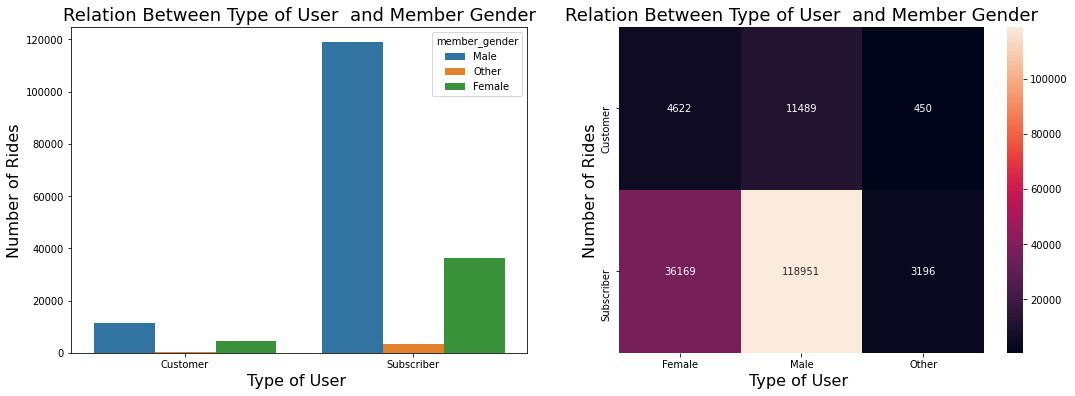

In [123]:
plt.figure(figsize = [18, 6])

# PLOT ON LEFT
plt.subplot(1, 2, 1)

sb.countplot(data=bike,x='user_type', hue='member_gender')
plt.xlabel('Type of User ',fontsize=16)
plt.ylabel('Number of Rides',fontsize=16)
plt.title('Relation Between Type of User  and Member Gender',fontsize=18);

# PLOT ON RIGHT
plt.subplot(1, 2, 2)

sb.heatmap(user_counts , annot=True , fmt='d');
plt.xlabel('Type of User ',fontsize=16)
plt.ylabel('Number of Rides',fontsize=16)
plt.title('Relation Between Type of User  and Member Gender',fontsize=18);

#### Remarks on relationship between Type of users and gender

> As you can see for the two plots :
> - **Male** are most people in  Subscriber and Customer Users.
> - Male Subscribers are 119K compared to only 11K for Male Customers.
> - Female Subscribers are 36K compared to only 4k for female customers.
> - Other gender Subscribers are 3K compared to only 450 of other customers

...........................................................................................................................

### Talk about some of the relationships you observed in this part of the investigation. How did the feature(s) of interest vary with other features in the dataset?

> In This section we have relationship between two variables of the dataset.
> We can conclude those observations :
> - Most people use the service are young (less than 40 year old),mostly between 25-40 year old
> - Most rides are less than 10 minutes.
> - There is no clear indication that there is a relation between member age and the duration of his/her ride.
> - There is no effect of gender in the distribution of the ride duration.
> - The three gender types have nearly the same distribution.
> - Male duration has slightly less in average of the other two types
> - Although  the number of customer is only 9.5 % of all users , they are more distributed and have more average duration than the Subscribers that represents 90.5 %.
> - **Male** are most people in  Subscriber and Customer Users.
> - Male Subscribers are 119K compared to only 11K for Male Customers.
> - Female Subscribers are 36K compared to only 4k for female customers.
> - Other gender Subscribers are 3K compared to only 450 of other customers

### Did you observe any interesting relationships between the other features (not the main feature(s) of interest)?

> I think everything we have got so far is expected , only that the customer users that they represent 9.5% of all users has more distribution and average duration exceeds the subscribers


## Multivariate Exploration

> In This Section we will create plots of three or more variables to investigate  data even further.

### Relationship Between Age , Duration and Gender

C:\Users\saidf.TENDER\Anaconda3\lib\site-packages\seaborn\axisgrid.py:316: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


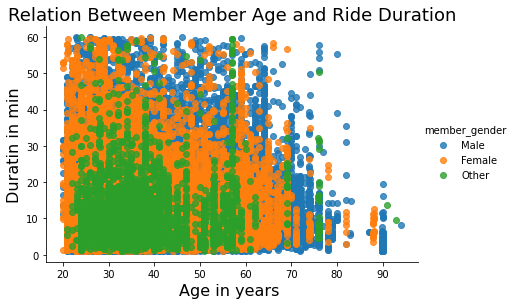

In [124]:
g= sb.FacetGrid(data=bike_mod2, hue = 'member_gender',size = 4 ,aspect =1.5)
g.map(sb.regplot,'age','dur_in_min',x_jitter=0.04,fit_reg=False);
plt.xlabel('Age in years ',fontsize=16)
g.add_legend()
plt.ylabel('Duratin in min',fontsize=16)
plt.title('Relation Between Member Age and Ride Duration',fontsize=18);

> As you can see .. it is not clear .. let us try a sampling

In [125]:
sample = bike_mod2.sample(10000)

C:\Users\saidf.TENDER\Anaconda3\lib\site-packages\seaborn\axisgrid.py:316: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


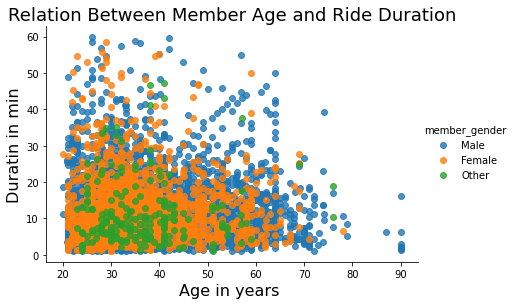

In [126]:
g= sb.FacetGrid(data=sample, hue = 'member_gender',size = 4 ,aspect =1.5)
g.map(sb.regplot,'age','dur_in_min',x_jitter=0.04,fit_reg=False);
plt.xlabel('Age in years ',fontsize=16)
g.add_legend()
plt.ylabel('Duratin in min',fontsize=16)
plt.title('Relation Between Member Age and Ride Duration',fontsize=18);

> It is also not clear .. let us try Faceting

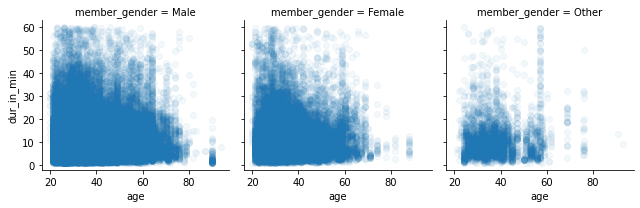

In [132]:
g = sb.FacetGrid(data = bike_mod2, col = 'member_gender')
g.map(sb.regplot,'age','dur_in_min',x_jitter=0.04,fit_reg=False , scatter_kws={'alpha':1/20});

> aslo not clear .. let us use the sample

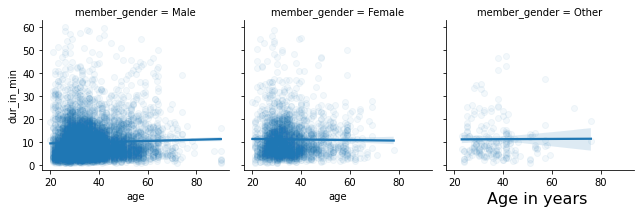

In [136]:
g = sb.FacetGrid(data = sample, col = 'member_gender')
g.map(sb.regplot,'age','dur_in_min',x_jitter=0.04,fit_reg=True, scatter_kws={'alpha':1/20});
plt.xlabel('Age in years ',fontsize=16);

#### Remarks on Gender , age and duration

> As you can see :
> - Male users have more rides , and more ride duration with density of users between 20 and 60
> - Female users  have less rides , and less ride duration with density of users between 20 and 40
> - Other users have less rides but more ride duration average and more spread in distribution for age.

### Relationship Between Age , Duration and User Type

C:\Users\saidf.TENDER\Anaconda3\lib\site-packages\seaborn\axisgrid.py:316: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


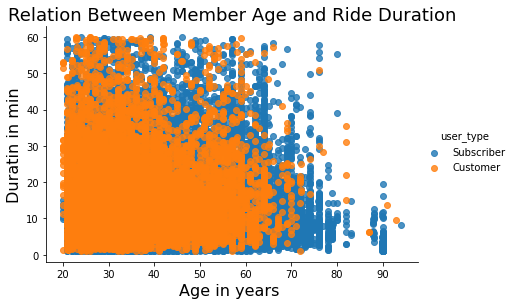

In [141]:
g= sb.FacetGrid(data=bike_mod2, hue = 'user_type',size = 4 ,aspect =1.5)
g.map(sb.regplot,'age','dur_in_min',x_jitter=0.04,fit_reg=False);
plt.xlabel('Age in years ',fontsize=16)
g.add_legend()
plt.ylabel('Duratin in min',fontsize=16)
plt.title('Relation Between Member Age and Ride Duration',fontsize=18);

> Not so clear so let us use sample 

In [142]:
sample = bike_mod2.sample(10000)

C:\Users\saidf.TENDER\Anaconda3\lib\site-packages\seaborn\axisgrid.py:316: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


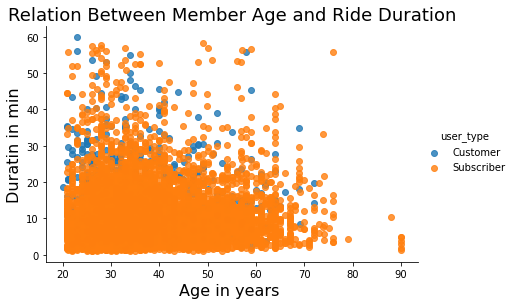

In [143]:
g= sb.FacetGrid(data=sample, hue = 'user_type',size = 4 ,aspect =1.5)
g.map(sb.regplot,'age','dur_in_min',x_jitter=0.04,fit_reg=False);
plt.xlabel('Age in years ',fontsize=16)
g.add_legend()
plt.ylabel('Duratin in min',fontsize=16)
plt.title('Relation Between Member Age and Ride Duration',fontsize=18);

> It is also not clear .. let us try Faceting

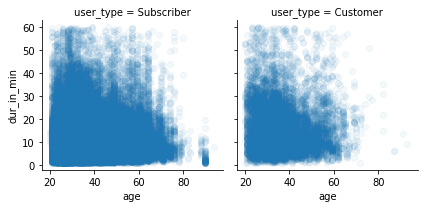

In [144]:
g = sb.FacetGrid(data = bike_mod2, col = 'user_type')
g.map(sb.regplot,'age','dur_in_min',x_jitter=0.04,fit_reg=False , scatter_kws={'alpha':1/20});

> aslo not clear .. let us use the sample

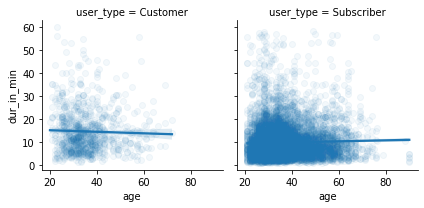

In [147]:
g = sb.FacetGrid(data = sample, col = 'user_type')
g.map(sb.regplot,'age','dur_in_min',x_jitter=0.04,fit_reg=True, scatter_kws={'alpha':1/20});

#### Remarks on Agem, Duration  and User Type relationship

> As you can see :
> - Subscribers have more spread age distribution and average of ride duration of  about 10 min
> - Subscribers have density in age between 20 and 60
> - Customers have less density with average of ride duration about 15 min and decrease with age growing
> - Customer have density of age between 20 and 40

### Talk about some of the relationships you observed in this part of the investigation. Were there features that strengthened each other in terms of looking at your feature(s) of interest?

> - Male users have more rides , and more ride duration with denesity of users between 20 and 60
> - Femal users  have less rides , and less ride duratin with denesity of users between 20 and 40
> - Other users have less rides but more ride duration avarage and more spread in distripution for age.
> - Subscribers have more spread age distripution and avarage of ride duration of  about 10 min
> - Subscribers have denisty in age between 20 and 60
> - Customrs have less density with avarage of ride duration about 15 min and decrease with age growing
> - Customer have denisty of age between 20 and 40 

### Were there any interesting or surprising interactions between features?

> -  Customer users have more ride duration avarage and less age ditribution than the subscribers